In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-06-20 14:45:18.219089: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 14:45:18.224364: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 14:45:18.310888: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 14:45:23.786883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading the Dataset:

The Reuters dataset is loaded, with a vocabulary size limited to the top 10,000 most frequently occurring words.

In [3]:
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

Decoding Function:

A function is provided to decode the newswires back to text for better understanding of the data.

In [4]:
# Function to decode newswires back to text
word_index = datasets.reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


Preprocessing the Data:

The newswire data is vectorized into binary matrices, where each entry corresponds to a word in the vocabulary.
The labels are one-hot encoded for categorical classification.

In [5]:
def decode_newswire(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Preprocess the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Building the Model:

A simple neural network with two hidden layers, each with 64 units and ReLU activation, and an output layer with 46 units (one for each class) and softmax activation is built.

In [7]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/home/oscar/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model:

The model is compiled using the Adam optimizer and categorical crossentropy loss.

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the Model:

The model is trained for 10 epochs with a batch size of 512, and the validation data is used to monitor performance.


In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/10


2024-06-20 14:46:22.824769: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 359280000 exceeds 10% of free system memory.


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3602 - loss: 3.4686

2024-06-20 14:46:29.351178: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89840000 exceeds 10% of free system memory.


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.3658 - loss: 3.4480 - val_accuracy: 0.5833 - val_loss: 2.1803
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6432 - loss: 1.8442 - val_accuracy: 0.6825 - val_loss: 1.5027
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7352 - loss: 1.2461 - val_accuracy: 0.7213 - val_loss: 1.2562
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.7975 - loss: 0.9446 - val_accuracy: 0.7556 - val_loss: 1.1135
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.8448 - loss: 0.7216 - val_accuracy: 0.7729 - val_loss: 1.0268
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8794 - loss: 0.5857 - val_accuracy: 0.7787 - val_loss: 0.9690
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.9106 - loss: 0.4281 - val_accuracy: 0.7881 - val_loss: 0.9450
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.9313 - loss: 0.3314 - val_accuracy: 0.7876 - val_

Evaluating the Model:

The model's performance is evaluated on the test data, and the test accuracy is printed.

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

2024-06-20 14:48:42.809361: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89840000 exceeds 10% of free system memory.


71/71 - 1s - 8ms/step - accuracy: 0.7925 - loss: 0.9586

Test accuracy: 0.7925200462341309


Here is the interpretation of the result:

```
71/71 - 1s - 8ms/step - accuracy: 0.7925 - loss: 0.9586

Test accuracy: 0.7925200462341309
```

### Breakdown of the Result:

1. **71/71**: 
   - This indicates that the model evaluated the test dataset in 71 batches. Since the test data is divided into batches for evaluation, the total number of batches was 71.

2. **1s**:
   - This is the total time it took to evaluate the test dataset, approximately 1 second.

3. **8ms/step**:
   - This is the average time per batch during evaluation, approximately 8 milliseconds per batch.

4. **accuracy: 0.7925**:
   - This indicates that the model's accuracy on the test dataset is 79.25%. Accuracy refers to the percentage of correct predictions the model made on the test dataset.

5. **loss: 0.9586**:
   - This is the value of the loss function on the test dataset, which in this case is 0.9586. The loss function measures how well or poorly the model is performing; generally, a lower value indicates better performance.

6. **Test accuracy: 0.7925200462341309**:
   - This is the model's accuracy presented with more decimal places, confirming that the accuracy is 79.25%.

### Interpretation:

The model has achieved an accuracy of 79.25% on the test dataset. This means that approximately 79.25% of the news articles were correctly classified into their respective categories. The loss of 0.9586 gives an idea of how much error the model has; generally, a lower loss is preferable. In this case, a loss of 0.9586 is moderate and might indicate room for improvement.

### Considerations:

1. **Accuracy**: An accuracy of 79.25% is reasonably good, but depending on the application, it may need to be improved.
2. **Loss**: A loss value of 0.9586 indicates that the model still has some margin of error. Techniques such as hyperparameter tuning, model adjustment, or using more training data might help reduce this loss.
3. **Time Interpretation**: The evaluation time of approximately 1 second for 71 batches, with an average of 8 milliseconds per batch, indicates that the model is quite efficient in terms of inference time.

In summary, the model has decent performance with an accuracy of 79.25%, but there is potential to improve its accuracy and reduce the loss with further adjustments.

Plotting Results:

The training and validation accuracy and loss are plotted to visualize the model's performance over the epochs.

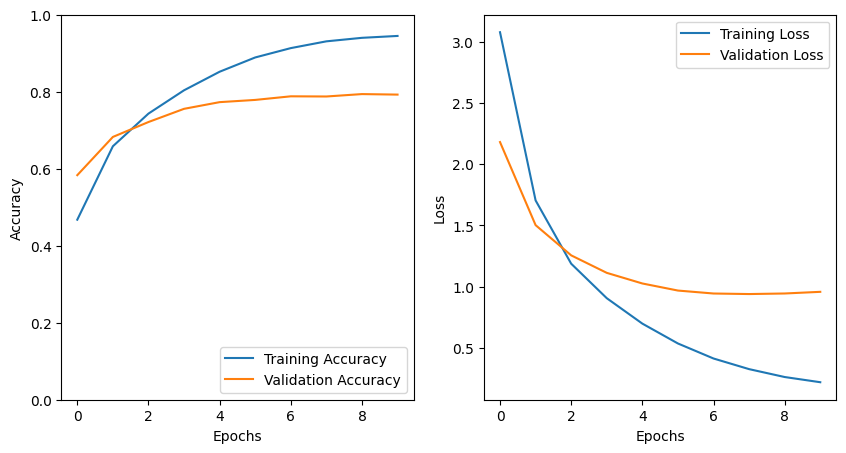

In [11]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()